# Apple Stock Price Using Support Vector Regression

## Table of Content

  ###  1. What is Support Vector Regression?
  ###  2. Importing Libraries
  ###  3. Loading Dataset
  ###  4. Data PreProcessing
  ###  5. EDA
  ###  6. Data Splitting
  ###  7. Model Training
  ###  8. Model Evaluation
  ###  9. Conclusion

## 1. What is Support Vector Regression?

### Support Vector Regression (SVR) is a type of regression analysis that uses Support Vector Machines (SVMs) to model the relationship between input variables and output variables. SVR is a powerful machine learning algorithm that is used for solving regression problems.

### The main idea behind SVR is to find a hyperplane that maximizes the margin between the predicted output and the actual output, while also minimizing the number of points that fall outside the margin. The hyperplane is found by minimizing a cost function that penalizes errors in the predictions.

### SVR is widely used in fields such as finance, economics, and engineering for predicting numerical values, such as stock prices, housing prices, and product demand.

![](https://scikit-learn.org/0.18/_images/sphx_glr_plot_svm_regression_001.png)

## 2. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## 3. Loading Dataset

In [3]:
aapl_stock = pd.read_csv('AAPL.csv')
aapl_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [4]:
aapl_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


## 4. Data Preprocessing

In [6]:
aapl_stock.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Here, In this Dataset No null or missing values.

In [8]:
# remove the unnecessary features
del aapl_stock['Adj Close']

In [9]:
aapl_stock.head()

,Date,Open,High,Low,Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600


In [11]:
aapl_stock.shape

(10468, 6)

In [21]:
X = aapl_stock[['Open','High','Low']]
Y = aapl_stock['Close']

## 5. EDA

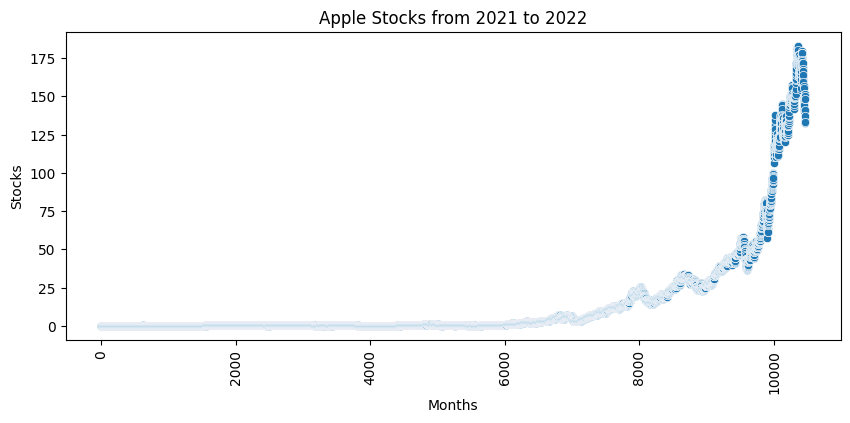

In [18]:
plt.figure(figsize=(10, 4))

sns.scatterplot(aapl_stock['High']);
plt.title('Apple Stocks from 2021 to 2022');
plt.ylabel('Stocks');
plt.xlabel('Months');
plt.xticks(rotation=90)
plt.show()

/var/folders/zd/ztbp2s155xg8jw7f449v64440000gn/T/ipykernel_36030/1876913255.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(aapl_stock.corr(), annot = True)


<Axes: >

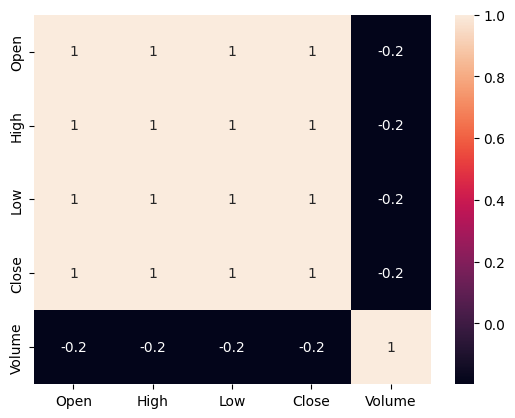

In [19]:
sns.heatmap(aapl_stock.corr(), annot = True) 

## 6. Data Splitting

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [23]:
print('x_train:', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train:', y_train.shape)
print('y_test: ', y_test.shape)

x_train: (7327, 3)
x_test:  (3141, 3)
y_train: (7327,)
y_test:  (3141,)


## 7. Model Training (SVR)

In [24]:
from sklearn.svm import SVR
model = SVR()

In [25]:
model.fit(x_train, y_train)

SVR()

In [26]:
model.score(x_test, y_test)

0.9954926157523446

In [27]:
predict = model.predict(x_test)
predict

array([15.43010179,  0.20963111,  0.43101797, ...,  0.38119862,
        0.3532458 ,  0.48428769])

## 8. Model Evaluation

### 1. Mean Absolute Error

In [29]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(predict, y_test))

0.38121106249804393


### 2. Mean Squared Error

In [30]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, predict))

4.96082250424737


### 3. Mean Squared Log Error

In [32]:
from sklearn.metrics import mean_squared_log_error

mean_squared_log_error(y_test, predict,squared=False)

0.050093049537907594

### 4. R2 Squared

In [33]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predict)
print(r2)

0.9954926157523446


### 5. Adjusted R Squared

In [36]:
n = 60 
k = 10  

r2 = r2_score(y_test, predict)  #r2 = r square score

adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)

0.9945727414160884


## 9. Conclusion

### In this project I worked on support vector regression (SVR) is a machine learning algorithm that has shown promising results in predicting Apple's stock prices. By analyzing historical data and market trends, an SVR model can identify patterns and make predictions with a reasonable Evaluation metric such as a Mean square error, root mean square error etc.